<a href="https://colab.research.google.com/github/Sowmya-2348562/Speech-Processing/blob/main/2348562_SPR_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fourier Transform and Frequency Spectrum Analysis of Signals


Question 1: Basic Sinusoidal Signal
(a) Generate a basic sinusoidal signal (5 Hz sampled at 1000 Hz)
A sinusoidal signal can be represented by the equation:

𝑥
(
𝑡
)
=
𝐴
⋅
sin
⁡
(
2
𝜋
𝑓
𝑡
)
x(t)=A⋅sin(2πft)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

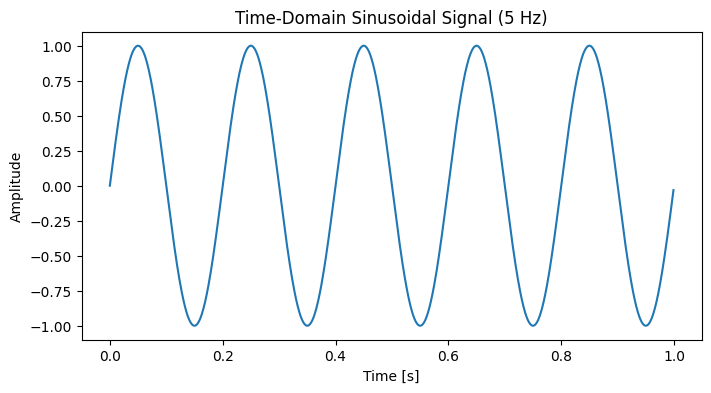

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
f = 5          # Frequency of the sine wave (Hz)
fs = 1000      # Sampling rate (Hz)
T = 1          # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector

# Generate Sine Wave
x = np.sin(2 * np.pi * f * t)

# Plot the time-domain waveform
plt.figure(figsize=(8, 4))
plt.plot(t, x)
plt.title('Time-Domain Sinusoidal Signal (5 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt



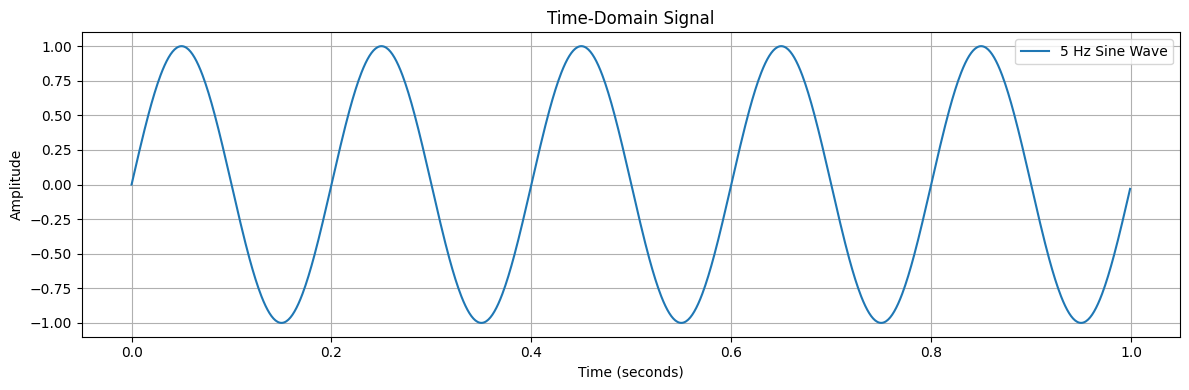

In [13]:
# Part 1(b): Plot the time-domain waveform


plt.figure(figsize=(12, 4))
plt.plot(t, x, label=f'{f} Hz Sine Wave')
plt.title('Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

(c) Compute and plot the DTFT
The Discrete-Time Fourier Transform (DTFT) provides a continuous frequency spectrum.

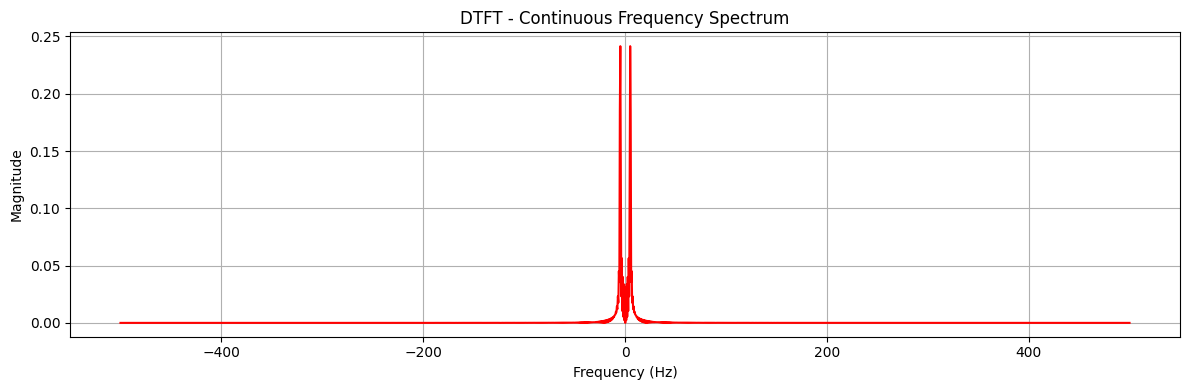

In [14]:
# Number of points for high-resolution FFT to approximate DTFT
N_dtft = 2048
X_dtft = np.fft.fft(x, N_dtft)
X_dtft_shifted = np.fft.fftshift(X_dtft)  # Shift zero frequency to center

# Frequency vector for DTFT
freq_dtft = np.linspace(-fs/2, fs/2, N_dtft)

# Compute Magnitude of DTFT
magnitude_dtft = np.abs(X_dtft_shifted) / N_dtft  # Normalize

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, magnitude_dtft, color='r')
plt.title('DTFT - Continuous Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

(d) Compute and plot the DFT
The Discrete Fourier Transform (DFT) provides the discrete frequency spectrum of the signal.

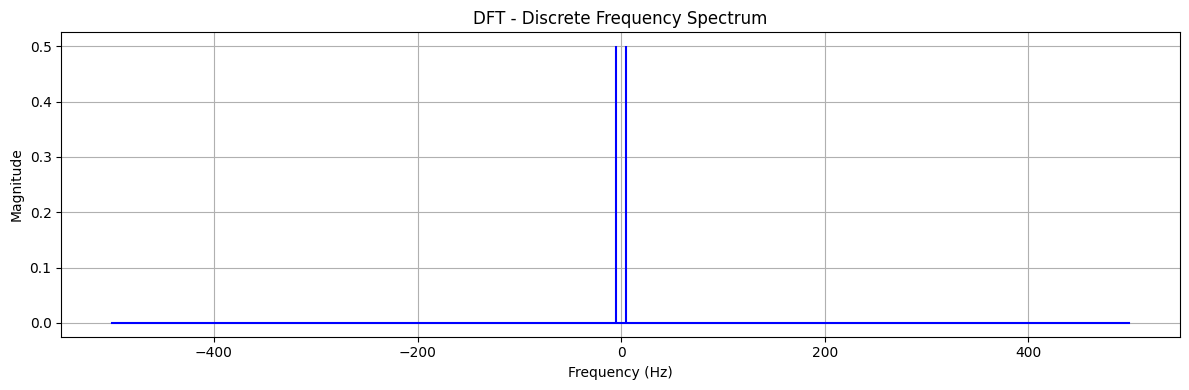

In [15]:
# Compute DFT using FFT
X_dft = np.fft.fft(x)
X_dft_shifted = np.fft.fftshift(X_dft)  # Shift zero frequency to center

# Frequency vector for DFT
N = len(x)
freq_dft = np.fft.fftfreq(N, d=1/fs)
freq_dft_shifted = np.fft.fftshift(freq_dft)

# Compute Magnitude of DFT
magnitude_dft = np.abs(X_dft_shifted) / N  # Normalize

plt.figure(figsize=(12, 4))
plt.stem(freq_dft_shifted, magnitude_dft, 'b', markerfmt=" ", basefmt="-b")
plt.title('DFT - Discrete Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Question 2: Composite Signal
(a) Generate a composite signal by adding two or more sinusoidal signals
We can create a composite signal by adding two sinusoidal signals with different frequencies and amplitudes. For example, let’s consider a 5 Hz and 15 Hz signal:

𝑥
(
𝑡
)
=
sin
⁡
(
2
𝜋
𝑓
1
𝑡
)
+
0.5
⋅
sin
⁡
(
2
𝜋
𝑓
2
𝑡
)
x(t)=sin(2πf
1
​
 t)+0.5⋅sin(2πf
2
​
 t)

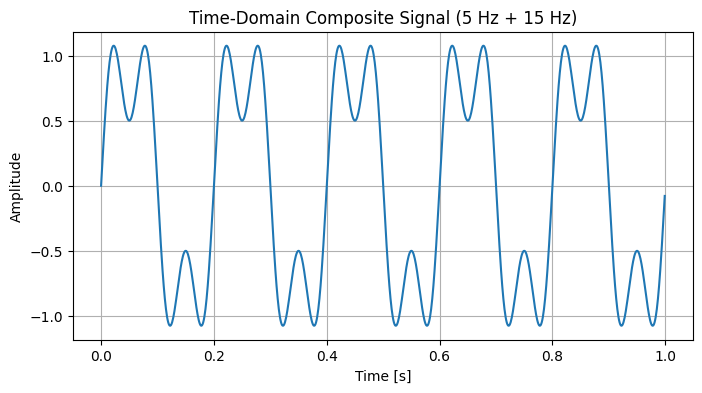

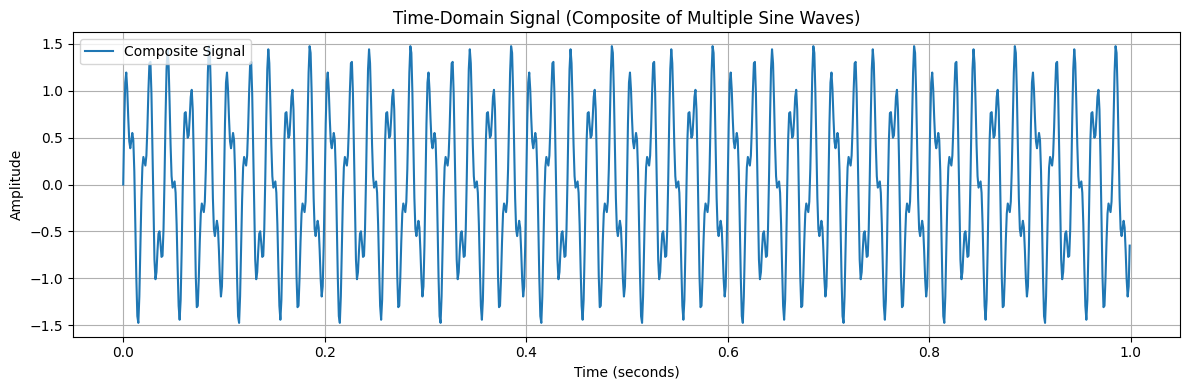

In [17]:
# Signal Parameters
fs = 1000      # Sampling rate (Hz)
T = 1          # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector

# Define multiple sine waves with different frequencies and amplitudes
# Sine Wave 1
f1 = 50        # Frequency of first sine wave (Hz)
A1 = 1.0       # Amplitude of first sine wave
x1 = A1 * np.sin(2 * np.pi * f1 * t)

# Sine Wave 2
f2 = 120       # Frequency of second sine wave (Hz)
A2 = 0.5       # Amplitude of second sine wave
x2 = A2 * np.sin(2 * np.pi * f2 * t)

# Composite signal: combination of 5 Hz and 15 Hz
f1, f2 = 5, 15  # Frequencies
x_composite = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the time-domain signal
plt.figure(figsize=(8, 4))
plt.plot(t, x_composite)
plt.title('Time-Domain Composite Signal (5 Hz + 15 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Composite Signal
x = x1 + x2

# Part 2(b): Plot the time-domain waveform of the composite signal


plt.figure(figsize=(12, 4))
plt.plot(t, x, label='Composite Signal')
plt.title('Time-Domain Signal (Composite of Multiple Sine Waves)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


2(c): Compute the Discrete-Time Fourier Transform (DTFT)
and plot the continuous frequency spectrum

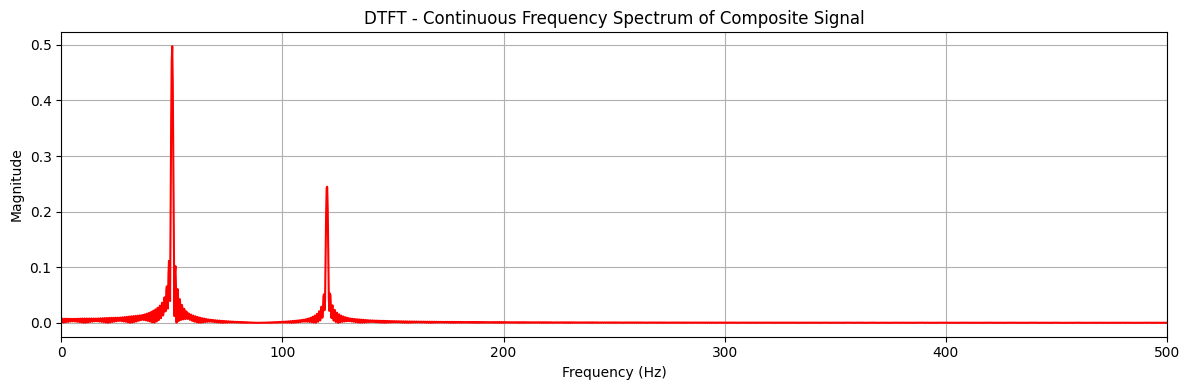

In [18]:
# Number of points for high-resolution FFT to approximate DTFT
N_dtft = 4096
X_dtft = np.fft.fft(x, N_dtft)
X_dtft_shifted = np.fft.fftshift(X_dtft)  # Shift zero frequency to center

# Frequency vector for DTFT
freq_dtft = np.linspace(-fs/2, fs/2, N_dtft)

# Compute Magnitude of DTFT
magnitude_dtft = np.abs(X_dtft_shifted) / len(x)  # Normalize

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, magnitude_dtft, color='r')
plt.title('DTFT - Continuous Frequency Spectrum of Composite Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # Typically, positive frequencies are of primary interest
plt.grid(True)
plt.tight_layout()
plt.show()

Part 2(d): Compute the Discrete Fourier Transform (DFT)
and plot the discrete frequency spectrum

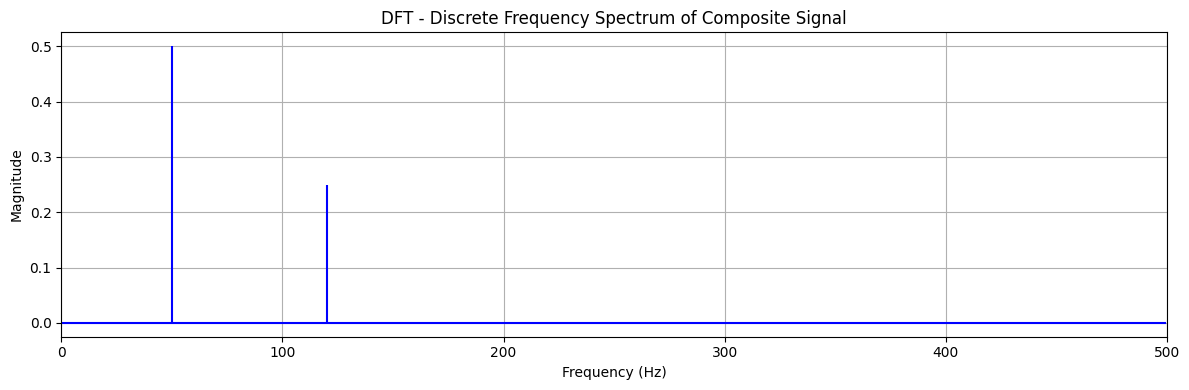

In [19]:
# Compute DFT using FFT
X_dft = np.fft.fft(x)
X_dft_shifted = np.fft.fftshift(X_dft)  # Shift zero frequency to center

# Frequency vector for DFT
N = len(x)
freq_dft = np.fft.fftfreq(N, d=1/fs)
freq_dft_shifted = np.fft.fftshift(freq_dft)

# Compute Magnitude of DFT
magnitude_dft = np.abs(X_dft_shifted) / N  # Normalize

plt.figure(figsize=(12, 4))
plt.stem(freq_dft_shifted, magnitude_dft, 'b', markerfmt=" ", basefmt="-b")
plt.title('DFT - Discrete Frequency Spectrum of Composite Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # Typically, positive frequencies are of primary interest
plt.grid(True)
plt.tight_layout()
plt.show()

Question 3: Exponentially Decaying Signal
(a) Generate an exponentially decaying signal
An exponentially decaying signal can be represented as:

𝑥
(
𝑡
)
=
𝑒
−
𝛼
𝑡
x(t)=e
−αt

Where
𝛼
α is a constant that controls the rate of decay.

Part 3(a): Generate an exponentially decaying signal

In [20]:
# Signal Parameters
fs = 1000      # Sampling rate (Hz)
T = 1          # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector

# Exponential Decay Parameters
a = 5          # Decay rate (controls how fast the signal decays)
# x[n] = e^{-a n T_s} where T_s = 1/fs
x = np.exp(-a * t)


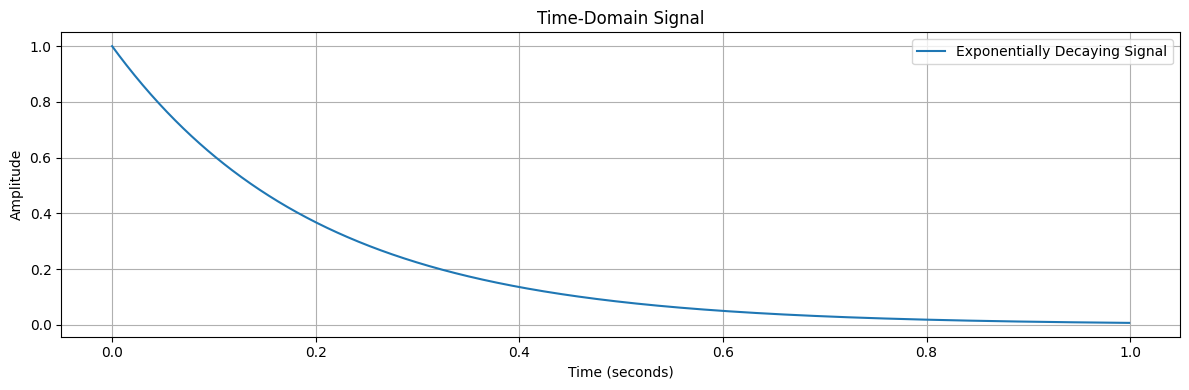

In [21]:
# Part 3(b): Plot the time-domain waveform


plt.figure(figsize=(12, 4))
plt.plot(t, x, label='Exponentially Decaying Signal')
plt.title('Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


3(c): Compute the Discrete-Time Fourier Transform (DTFT)
and plot the continuous frequency spectrum

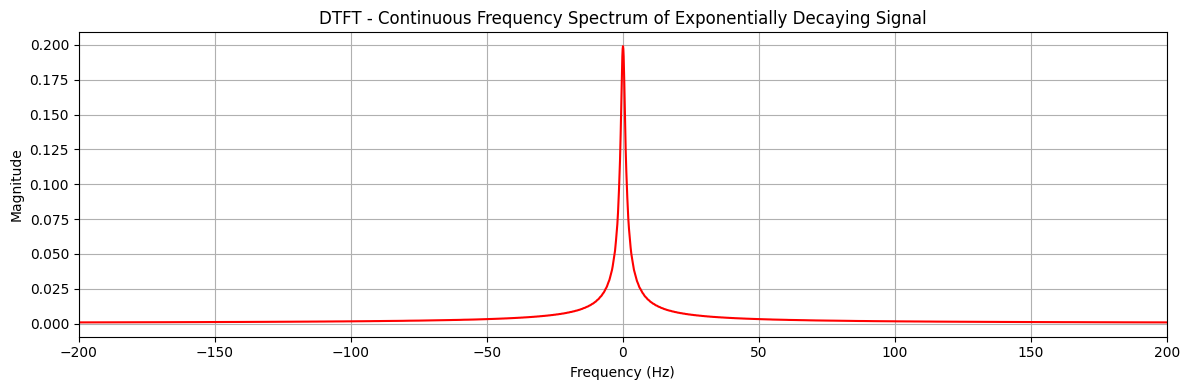

In [22]:
# Number of points for high-resolution FFT to approximate DTFT
N_dtft = 8192
X_dtft = np.fft.fft(x, N_dtft)
X_dtft_shifted = np.fft.fftshift(X_dtft)  # Shift zero frequency to center

# Frequency vector for DTFT
freq_dtft = np.linspace(-fs/2, fs/2, N_dtft)

# Compute Magnitude of DTFT
magnitude_dtft = np.abs(X_dtft_shifted) / len(x)  # Normalize

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, magnitude_dtft, color='r')
plt.title('DTFT - Continuous Frequency Spectrum of Exponentially Decaying Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-200, 200)  # Adjusted for better visibility around main components
plt.grid(True)
plt.tight_layout()
plt.show()

3(d): Compute the Discrete Fourier Transform (DFT)
and plot the discrete frequency spectrum

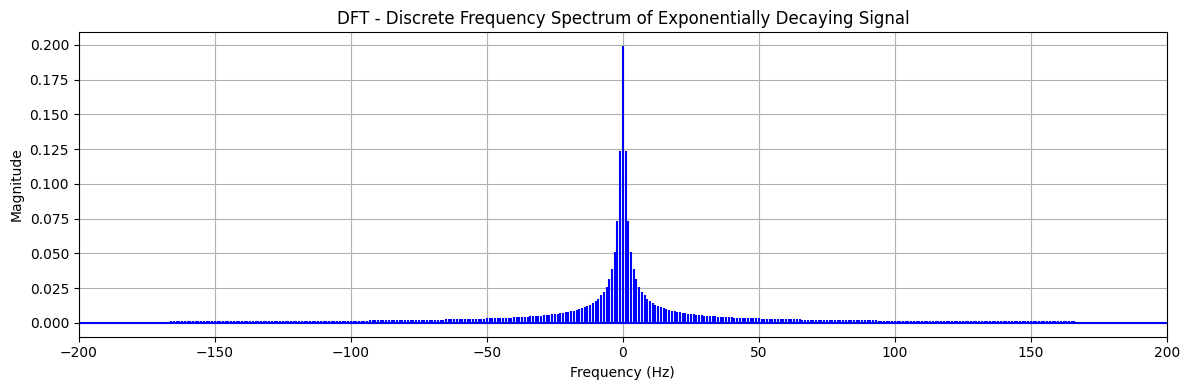

In [23]:
# Compute DFT using FFT
X_dft = np.fft.fft(x)
X_dft_shifted = np.fft.fftshift(X_dft)  # Shift zero frequency to center

# Frequency vector for DFT
N = len(x)
freq_dft = np.fft.fftfreq(N, d=1/fs)
freq_dft_shifted = np.fft.fftshift(freq_dft)

# Compute Magnitude of DFT
magnitude_dft = np.abs(X_dft_shifted) / N  # Normalize

plt.figure(figsize=(12, 4))
plt.stem(freq_dft_shifted, magnitude_dft, 'b', markerfmt=" ", basefmt="-b")
plt.title('DFT - Discrete Frequency Spectrum of Exponentially Decaying Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-200, 200)  # Adjusted for better visibility around main components
plt.grid(True)
plt.tight_layout()
plt.show()

(e) Analyze the relationship between the time-domain waveform and the
frequency-domain representation.

An exponentially decaying signal in the time domain exhibits a wide frequency spectrum in the frequency domain. This is due to the signal's rapid changes over time, which require a combination of multiple frequency components to accurately represent it.

1. **Time-Domain Characteristics:**
   - The signal starts with a maximum amplitude at time t=0 and decays towards zero as time progresses.
   - The rapid initial changes in the signal require high-frequency components to capture the sharp transition.

2. **Frequency-Domain Characteristics:**
   - The DTFT plot shows a broad frequency spectrum without distinct peaks, indicating that the signal contains a wide range of frequency components.
   - This is consistent with the time-domain behavior where the exponential decay cannot be represented by a single or a few sinusoidal components.
   - The DFT plot, being a sampled version of the DTFT, also reflects this wide frequency distribution through its discrete spikes, though they are closely spaced due to the high resolution of the FFT.

3. **Implications:**
   - Signals that decay rapidly in time require a rich set of frequency components to be accurately represented in the frequency domain.
   - The uncertainty principle in signal processing states that a signal cannot be simultaneously localized in both time and frequency domains. An exponentially decaying signal is more localized in time but spread out in frequency.

4. **Conclusion:**
   - The exponential decay in the time domain results in a broad and continuous frequency spectrum, highlighting the trade-off between time and frequency localization. This demonstrates the fundamental relationship between a signal's temporal behavior and its frequency content.

Inference:
DTFT provides a continuous frequency spectrum, representing all possible frequencies of a signal, which gives more detailed information for analysis.
DFT, being discrete, captures the frequency components at distinct intervals. For periodic signals, the frequency components are clearly visible and correspond to the fundamental and harmonic frequencies.
For composite signals, the frequency spectrum clearly shows the contribution of multiple sinusoidal components.
In the case of exponentially decaying signals, the spectrum is more spread out, with the higher frequencies decaying due to the nature of the signal's time-domain representation.
The Fourier Transform allows us to understand the frequency content of various signals, demonstrating the relationship between time-domain and frequency-domain representations.

1. Basic Sinusoidal Signal
Time-Domain Inference: A basic sinusoidal signal (such as a 5 Hz sine wave) exhibits a smooth, periodic oscillation in the time domain. The amplitude remains constant over time, indicating a pure tone.

Frequency-Domain Inference (DTFT & DFT): The DTFT of the sinusoidal signal results in a sharp peak at 5 Hz, which reflects the signal's fundamental frequency. In the DFT, the same peak appears as discrete points at 5 Hz, and the symmetry in the spectrum shows that the signal contains no other frequency components. This confirms that the signal is pure, containing energy at one frequency.

Relationship Between Time and Frequency: Since the signal is periodic in time, it corresponds to a distinct peak in the frequency domain, illustrating the relationship between periodic time-domain signals and frequency localization.

2. Composite Signal (Sum of Multiple Sinusoids)
Time-Domain Inference: A composite signal, formed by adding sinusoids of different frequencies (e.g., 5 Hz and 15 Hz), appears more complex in the time domain. Its waveform no longer shows simple periodic behavior but instead exhibits interference patterns due to the combination of multiple frequency components.

Frequency-Domain Inference (DTFT & DFT): In the frequency domain, distinct peaks appear at the individual frequencies of the components (5 Hz and 15 Hz in this example). The amplitudes of the peaks correspond to the amplitudes of the sinusoids, providing a clear decomposition of the signal into its fundamental frequencies. In the DFT, discrete points represent these frequency components.

Relationship Between Time and Frequency: The more complex time-domain signal is reflected in the frequency domain by multiple peaks. The Fourier Transform successfully separates the signal into its constituent frequencies, illustrating its power in analyzing mixed signals.

3. Exponentially Decaying Signal
Time-Domain Inference: An exponentially decaying signal shows rapid attenuation over time. The amplitude decreases sharply, indicating that the signal's energy diminishes as time progresses.

Frequency-Domain Inference (DTFT & DFT): In the frequency domain, the decaying signal spreads over a broader frequency range. The DTFT reveals a continuous spectrum with no sharp peaks, while the DFT displays discrete points representing the frequency content. This broad spectrum indicates that the rapid changes in the time domain correspond to the presence of higher frequency components.

Relationship Between Time and Frequency: Exponentially decaying signals do not have a distinct frequency but instead exhibit a wide range of frequencies in the spectrum. The rapid time-domain decay causes the signal's energy to spread across many frequencies, illustrating how time-domain attenuation affects the frequency distribution.

4. Exponentially Decaying Signal (Further Analysis)
Time-Domain Inference: The time-domain behavior of the exponentially decaying signal is similar to the previous case, with the signal diminishing quickly over time. The initial amplitude is large, but it reduces significantly as time progresses.

Frequency-Domain Inference (DTFT & DFT): Both the DTFT and DFT reveal a broad frequency spectrum, with energy spread across a wide range of frequencies. However, the DTFT gives a continuous frequency spectrum, while the DFT provides discrete samples of the same spectrum.

Relationship Between Time and Frequency: As with the previous exponentially decaying signal, the broader frequency spectrum is the result of rapid decay in the time domain. This demonstrates that signals with sharp time-domain changes, such as decays or spikes, contain higher frequency components, as evidenced by the broad frequency content in the Fourier analysis.

Inference on Frequency Domain Analysis Using DTFT and DFT:
Pure Sinusoids: A sinusoidal signal results in a sharp peak at its fundamental frequency in both the DTFT and DFT. This indicates that the signal contains energy at only one frequency, showing how periodic signals are localized in the frequency domain.

Composite Signals: When multiple sinusoids are added together, the frequency spectrum shows multiple peaks at each individual frequency. The amplitude of these peaks represents the relative contribution of each component, illustrating how the Fourier Transform breaks down complex signals into their basic frequency components.

Exponentially Decaying Signals: Exponentially decaying signals exhibit a broad spectrum in both the DTFT and DFT, as their rapid time-domain changes correspond to a wide range of frequency components. This is a typical result of signals that vary sharply in time, showing that transient signals spread energy over a broad frequency range.

DTFT vs. DFT: The DTFT provides a continuous view of the frequency spectrum, offering greater insight into the entire frequency content of the signal. In contrast, the DFT samples this spectrum at discrete intervals, making it more practical for digital computation but potentially less accurate if the sampling frequency is insufficient.

Relationship Between Time and Frequency Domains: There is a clear relationship between the time-domain behavior and the frequency spectrum of a signal. Periodic signals have distinct peaks in the frequency domain, while transient or decaying signals spread energy across multiple frequencies. The sharper the changes in the time domain, the broader the frequency range in the spectrum.

Conclusion:
The Fourier Transform, through both the DTFT and DFT, provides invaluable insight into the frequency content of time-domain signals. Whether analyzing simple sinusoids, composite signals, or exponentially decaying signals, the frequency domain representation reveals essential characteristics that are not immediately apparent in the time domain. This powerful tool allows for the decomposition of complex signals into their constituent frequencies, enabling more effective signal processing and analysis.